# Lab 8: Define and Solve an ML Problem of Your Choosing

In [25]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [26]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the Census data set
2. I will be predicting whether a person's income is above or below $50,000. The label is "income_binary"
3. This is a supervised learning and binary classification problem.
4. My features are: age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, native-country
5. This problem is important because it helps us understand how demographic and socioeconomic factors relate to income. A company can use this to develop fair policies for hiring, training and financial support.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [27]:
#Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [28]:
df.shape

(32561, 15)

In [29]:
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [30]:
#Filling in columns with null values
#Fill numerical columns with the median
df['age'].fillna(df['age'].median(), inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].median(), inplace=True)

#Filling categorical columns with the mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


In [31]:
#finding and replacing outliers
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24532,NaN,10501,NaN,14976,5983,13193,27816,21790,NaN,NaN,NaN,29753,24720
mean,38.581309,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.445932,NaN,NaN
std,13.614327,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.292020,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


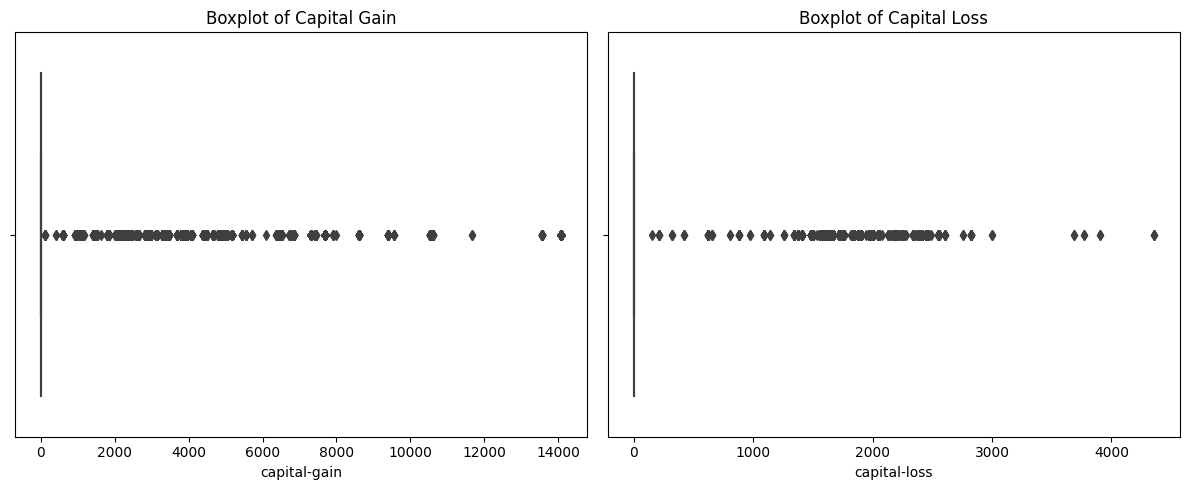

In [32]:
#Visualize the data
plt.figure(figsize=(12, 5))

# Capital Gain
plt.subplot(1, 2, 1)
sns.boxplot(x=df['capital-gain'])
plt.title('Boxplot of Capital Gain')

# Capital Loss
plt.subplot(1, 2, 2)
sns.boxplot(x=df['capital-loss'])
plt.title('Boxplot of Capital Loss')

plt.tight_layout()
plt.show()

In [33]:
#removing outliers
df['capital-gain'] = df['capital-gain'].clip(upper=10000)
df['capital-loss'] = df['capital-loss'].clip(upper=3000)

In [34]:
# selecting appropriate features and removing irrelevant features
dropped = ["fnlwgt"]
df = df.drop(columns=dropped)

In [35]:
#performing feature engineering techniques such as one-hot encoding on categorical features
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country',
 'income_binary']

In [36]:
to_encode.remove('income_binary')
df[to_encode].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
dtype: int64

In [37]:
#One-hot encoding
df = pd.get_dummies(df, columns=to_encode, drop_first=True)

df.shape

(32561, 97)

In [38]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,13,2174,0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13,0,0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9,0,0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7,0,0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13,0,0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?

Logistic Regression

3. How will you evaluate and improve the model's performance? Are there specific evaluation metrics and methods that are appropriate for your model?

I will evaluate my model's performance using metrics like accuracy, precision and recall.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data, I removed the fnlwgt column as it does not provide predictive value for the income classification problem. My new feature list includes all remaining columns.

I performed capping to remove outliers and I computed missing value. 

To prepare the data for modeling, I applied one-hot encoding to all categorical features.

I also addressed missingness using median (for numeric) and mode (for categorical) to compute missing values.

For modeling, I plan to start with Logistic Regression because of how interpretable and suitable it is for binary classification, then compare its performance with models like Decision Trees and Random Forests. 

I will split the data into training and test sets, train the models on the training data, and evaluate performance on the test set using accuracy, precision, recall. 

To improve performance, I will use techniques like GridSearchCV) and cross-validation.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [40]:
# Features

features = df.drop(columns=['income_binary']).columns.tolist()
print(features)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-hous

In [41]:
# Creating labeled examples
y = df['income_binary']

X = df[features]


print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))

Number of examples: 32561

Number of Features:96


In [42]:
#Create Training and Test Data Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21815, 96) (10746, 96)
(21815,) (10746,)


In [43]:

from sklearn.preprocessing import StandardScaler

# Scaling my features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#Creating the LogisticRegression model

model = LogisticRegression(max_iter=1000)

#Fitting the model to the training data below

model.fit(X_train_scaled, y_train)

#Making predictions on the test data using the predict_proba() method and assign the 
# result to the variable 'probability_predictions' below

probability_predictions = model.predict_proba(X_test_scaled)

#printing the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

#Computing the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))



#Making predictions on the test data using the predict() method and assign the result 
# to the variable 'class_label_predictions' below

class_label_predictions = model.predict(X_test_scaled)


#printing the first 5 class label predictions 
print('Class labels: ' + str(class_label_predictions[0:5]))

#Computing the accuracy score on 'class_label_predictions' and save the result 
# to the variable 'acc_score' below


acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.470997     0.529003
     0.472320     0.527680
     0.996670     0.003330
     0.204368     0.795632
     0.992519     0.007481
Log loss: 0.3351573565105625
Class labels: ['>50K' '>50K' '<=50K' '>50K' '<=50K']
Accuracy: 0.8439419318816304


In [44]:
#Trying a different model

from sklearn.ensemble import RandomForestClassifier

# Creating and training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predicting class labels
rf_predictions = rf_model.predict(X_test)

# Predicting class probabilities (for log loss)
rf_probs = rf_model.predict_proba(X_test)

# Evaluating
rf_acc = accuracy_score(y_test, rf_preds)
rf_logloss = log_loss(y_test, rf_probs)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest Log Loss:", rf_logloss)

Random Forest Accuracy: 0.8534338358458962
Random Forest Log Loss: 0.5556154816046259


I compared the performance of logistic regression with a Random Forest classifier. Surprisingly, the simpler logistic regression model outperformed the Random Forest, achieving a higher accuracy (84.39% vs. 83.68%) and lower log loss (0.335 vs. 0.556). This could mean that the relationships in the dataset are mostly linear and can be effectively modeled with logistic regression. 

In [45]:
#Trying hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Setting up grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Predicting and evaluating
rf_preds = best_rf.predict(X_test)
rf_probs = best_rf.predict_proba(X_test)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Tuned RF Accuracy:", accuracy_score(y_test, rf_preds))
print("Tuned RF Log Loss:", log_loss(y_test, rf_probs))


Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Tuned RF Accuracy: 0.8534338358458962
Tuned RF Log Loss: 0.3149555628702842


After comparing logistic regression and Random Forest, I found that the tuned Random Forest model produced the best results. I used GridSearchCV, I optimized the number of trees, tree depth, split criteria, and feature sampling strategy. The best model achieved an accuracy of 85.34% and a log loss of 0.315, outperforming both the baseline logistic regression (84.39%, log loss: 0.335) and the untuned Random Forest (83.68%, log loss: 0.556). This shows that hyperparameter tuning is an important step in improving model performance.

